# Import package

In [2]:
import itertools
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

In [24]:
df=pd.read_csv('D:\semester-5\Jaringan-syaraf-tiruan\Project\stock_price.csv')

# Memanggil data terbawah (default=5)
df.head()

,Date,Open,High,Low,Close,Volume,AdjustedClose
0,20241107,4610.0,4640.0,4550.0,4550.0,296218600,4550.0
1,20241108,4600.0,4640.0,4520.0,4520.0,213862600,4520.0
2,20241111,4470.0,4540.0,4370.0,4460.0,507192300,4460.0
3,20241112,4430.0,4520.0,4430.0,4500.0,252380100,4500.0
4,20241113,4470.0,4610.0,4460.0,4580.0,209627200,4580.0


In [25]:
df = df.drop(['Open', 'High', 'Low', 'Volume', 'AdjustedClose'], axis=1)

In [26]:
df.head()

,Date,Close
0,20241107,4550.0
1,20241108,4520.0
2,20241111,4460.0
3,20241112,4500.0
4,20241113,4580.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    236 non-null    int64  
 1   Close   236 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.8 KB


In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    236 non-null    datetime64[ns]
 1   Close   236 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 KB


In [29]:
# Setting indeks menjadi indeks runtun waktu
# Setting indeks menjadi indeks runtun waktu
ts_df=df.set_index('Date')
ts_df.head()

,Close
Date,
20241107,4550.0
20241108,4520.0
20241111,4460.0
20241112,4500.0
20241113,4580.0


Text(0, 0.5, 'Harga (IDR)')

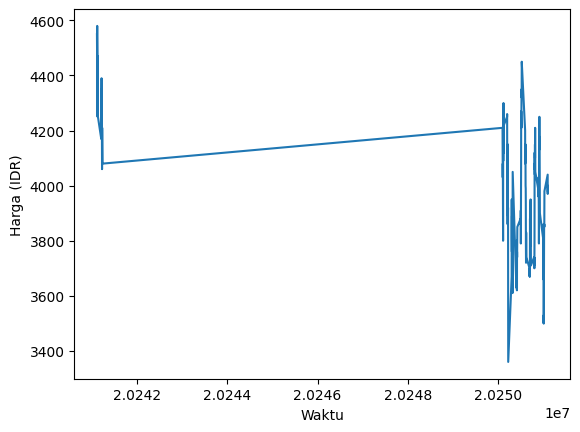

In [30]:
#Plot Time Series ini jika tidak dilakukan proses pengindeksan runtun waktu, maka variabel Y hanya berupa urutan observasi

fig=plt.figure()
plt.plot(ts_df)
plt.xlabel('Waktu')
plt.ylabel('Harga (IDR)')